In [62]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [96]:
def evaluate_o2d(t, state):
    '''
    evaluate the 2d lonely oscillator at state (x, x_dot, y, y_dot)
    '''
    
    k1 = 6
    k2 = 10
    k3 = 13
    k4 = 15
    m = 2
    W = 600
    G = 9.8
    
    [x, x_dot, y, y_dot] = state # unpack state
    
    x_diff = x_dot
    vx_diff = ( -k1*x + k2*(W-x) + k3*(W-x) -k4*x )/m
    y_diff = y_dot
    vy_diff = ( -k1*y -k2*y + k3*(W-y) + k4*(W-y) )/m - G
    
    return np.array( [x_diff, vx_diff, y_diff, vy_diff]) 

In [97]:
# reference: https://prappleizer.github.io/Tutorials/RK4/RK4_Tutorial.html

def rk4(t,dt,state,evaluate):
    '''
    Given a vector state at t, calculate state at t+dt
    using rk4 method
    '''
    k1 = dt * evaluate(t, state)
    k2 = dt * evaluate(t + 0.5*dt, state + 0.5*k1)
    k3 = dt * evaluate(t + 0.5*dt, state + 0.5*k2)
    k4 = dt * evaluate(t + dt, state + k3)
    
    state_delta = (1/6.)*(k1+ 2*k2 + 2*k3 + k4)
    state_t_dt = state + state_delta
    
    return state_t_dt, state_delta

In [121]:
# Running a small integration
dt = 0.02
T = 5

state_0 = np.array( [150, 500, 200, 0] )
history = [state_0]
history_delta = []
ts = [0]

nsteps = int(T/dt)
for i in range(nsteps):
    t = ts[-1]
    state_new, state_delta = rk4 (t, dt, history[-1], evaluate_o2d)
    history.append(state_new)
    
    t += dt
    ts.append(t)
    
history = np.array(history)
ts = np.array(ts)

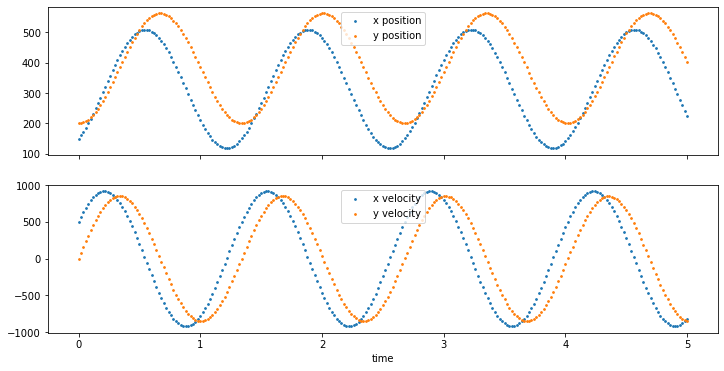

In [122]:
fig, ax = plt.subplots(2,1,figsize=(12,6),sharex=True)
ax[0].scatter(ts,history[:,0],color='C0',s=3,label='x position')
ax[0].scatter(ts,history[:,2],color='C1',s=3,label='y position')
ax[0].legend(loc="upper center")

ax[1].scatter(ts,history[:,1],color='C0',s=3,label='x velocity')
ax[1].scatter(ts,history[:,3],color='C1',s=3,label='y velocity')
ax[1].legend(loc="upper center")
ax[-1].set_xlabel('time');

### Visualize the simulated trajectory

### Plotting output collected from pytest interacting with StarkNet contract

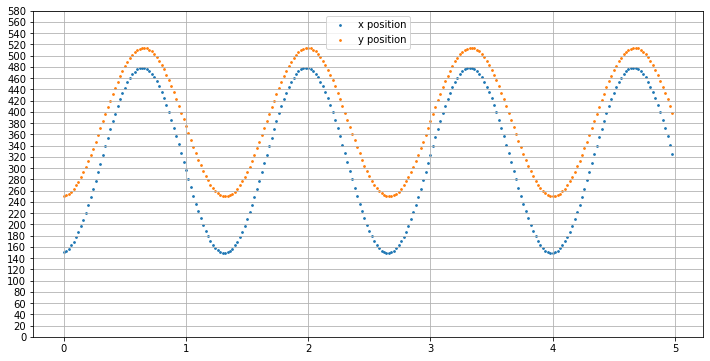

In [111]:
### using 10,000 as SCALE_FP, consistent with cairo contract setup
SCALE_FP = 10000

# paste coordinates returned by cairo contract below 愚公移山
x_history = [1500000, 1527165, 1568480, 1623582, 1691987, 1773093, 1866187, 1970450, 2084966, 2208727, 2340646, 2479562, 2624253, 2773447, 2925833, 3080070, 3234802, 3388668, 3540316, 3688412, 3831653, 3968780, 4098587, 4219933, 4331750, 4433056, 4522959, 4600669, 4665503, 4716890, 4754378, 4777638, 4786466, 4780784, 4760641, 4726215, 4677809, 4615848, 4540877, 4453555, 4354651, 4245034, 4125667, 3997601, 3861961, 3719941, 3572789, 3421799, 3268299, 3113639, 2959179, 2806277, 2656278, 2510500, 2370226, 2236689, 2111063, 1994453, 1887885, 1792295, 1708524, 1637309, 1579276, 1534935, 1504676, 1488766, 1487344, 1500423, 1527887, 1569496, 1624883, 1693561, 1774926, 1868263, 1972751, 2087472, 2211416, 2343494, 2482544, 2627343, 2776618, 2929057, 3083319, 3238047, 3391880, 3543467, 3691474, 3834599, 3971584, 4101225, 4222382, 4333988, 4435063, 4524718, 4602164, 4666721, 4717820, 4755013, 4777972, 4786496, 4780509, 4760064, 4725341, 4676645, 4614405, 4539168, 4451595, 4352456, 4242624, 4123064, 3994827, 3859041, 3716900, 3569654, 3418598, 3265060, 3110390, 2955949, 2803094, 2653170, 2507495, 2367350, 2233967, 2108520, 1992111, 1885764, 1790414, 1706900, 1635955, 1578204, 1534155, 1504195, 1488588, 1487470, 1500852, 1528616, 1570518, 1626189, 1695140, 1776764, 1870344, 1975057, 2089982, 2214108, 2346344, 2485527, 2630433, 2779788, 2932279, 3086565, 3241288, 3395088, 3546613, 3694531, 3837541, 3974385, 4103859, 4224826, 4336221, 4437065, 4526471, 4603653, 4667933, 4718745, 4755642, 4778300, 4786519, 4780228, 4759481, 4724461, 4675477, 4612958, 4537455, 4449631, 4350259, 4240212, 4120459, 3992052, 3856120, 3713859, 3566520, 3415398, 3261822, 3107144, 2952722, 2799915, 2650067, 2504495, 2364479, 2231251, 2105982, 1989774, 1883648, 1788538, 1705280, 1634606, 1577138, 1533381, 1503720, 1488416, 1487603, 1501289, 1529353, 1571548, 1627503, 1696727, 1778610, 1872432, 1977369, 2092497, 2216804, 2349198, 2488514, 2633527, 2782961, 2935503, 3089811, 3244529, 3398295, 3549758, 3697586, 3840479, 3977180, 4106487, 4227263, 4338447, 4439060, 4528217, 4605135, 4669137, 4719661, 4756262, 4778619, 4786534, 4779938, 4758889, 4723573, 4674300, 4611503, 4535734, 4447660, 4348055, 4237794, 4117848, 3989271, 3853194, 3710814, 3563382, 3412195, 3258583]
y_history = [2500000, 2515781, 2543014, 2581460, 2630781, 2690544, 2760223, 2839205, 2926795, 3022224, 3124652, 3233179, 3346850, 3464665, 3585589, 3708558, 3832492, 3956300, 4078893, 4199193, 4316143, 4428714, 4535916, 4636807, 4730499, 4816169, 4893063, 4960505, 5017902, 5064749, 5100634, 5125242, 5138356, 5139861, 5129744, 5108094, 5075101, 5031055, 4976344, 4911448, 4836939, 4753471, 4661778, 4562667, 4457010, 4345735, 4229821, 4110287, 3988184, 3864587, 3740582, 3617259, 3495703, 3376982, 3262141, 3152190, 3048095, 2950772, 2861076, 2779797, 2707649, 2645266, 2593197, 2551900, 2521738, 2502976, 2495780, 2500212, 2516234, 2543705, 2582383, 2631928, 2691904, 2761784, 2840954, 2928717, 3024301, 3126867, 3235512, 3349280, 3467171, 3588149, 3711150, 3835092, 3958886, 4081442, 4201683, 4318552, 4431021, 4538100, 4638849, 4732382, 4817875, 4894577, 4961814, 5018995, 5065616, 5101268, 5125637, 5138509, 5139770, 5129410, 5107520, 5074292, 5030018, 4975088, 4909984, 4835280, 4751632, 4659775, 4560518, 4454733, 4343350, 4227349, 4107750, 3985605, 3861988, 3737986, 3614689, 3493181, 3374531, 3259782, 3149944, 3045982, 2948810, 2859283, 2778188, 2706238, 2644066, 2592219, 2551152, 2521227, 2502707, 2495754, 2500430, 2516694, 2544402, 2583311, 2633079, 2693269, 2763351, 2842708, 2930643, 3026383, 3129085, 3237847, 3351712, 3469679, 3590711, 3713743, 3837693, 3961472, 4083990, 4204171, 4320958, 4433324, 4540280, 4640886, 4734258, 4819574, 4896085, 4963117, 5020081, 5066476, 5101894, 5126024, 5138653, 5139671, 5129068, 5106938, 5073475, 5028973, 4973824, 4908513, 4833614, 4749786, 4657766, 4558363, 4452451, 4340962, 4224875, 4105212, 3983025, 3859389, 3735390, 3612119, 3490660, 3372081, 3257425, 3147700, 3043871, 2946851, 2857493, 2776583, 2704832, 2642871, 2591245, 2550408, 2520719, 2502440, 2495731, 2500651, 2517157, 2545104, 2584245, 2634237, 2694640, 2764923, 2844467, 2932574, 3028468, 3131307, 3240186, 3354148, 3472190, 3593274, 3716336, 3840294, 3964058, 4086538, 4206658, 4323363, 4435625, 4542458, 4642922, 4736133, 4821272, 4897590, 4964417, 5021164, 5067333, 5102517, 5126407, 5138793, 5139566, 5128720, 5106350, 5072652, 5027923, 4972556, 4907038, 4831945, 4747937, 4655754, 4556205, 4450167, 4338571, 4222399, 4102672, 3980444]

total_n = len(x_history)

x_history = [x/SCALE_FP for x in x_history]
y_history = [y/SCALE_FP for y in y_history]
t_s = [i*dt for i in range(len(x_history))]

fig, ax = plt.subplots(1,1,figsize=(12,6))

view_n = total_n
ax.scatter(t_s[0:view_n], x_history[0:view_n], color='C0', s=3, label='x position')
ax.scatter(t_s[0:view_n], y_history[0:view_n], color='C1', s=3, label='y position')
ax.legend(loc="upper center")
plt.yticks(np.arange(0, 600, 20))
plt.grid()

# eyeball confirm the plot matches simulation above
